In [181]:
import sklearn.linear_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [253]:
df = pd.read_csv('dataset.csv')
df = df.drop('Unnamed: 0',1)
df.head()

df.head(10)

,ID,A/c Bal,Fixed Deposit,Active Loans,Level of Referees,Paid Loans,col12,Paid Loans Sum,Paid Loan Sum,Reference_factor,penalty_active_loans,final
0,1000,4392001,77000,[9160000],"[4, 3]","[8490000, 2090000]",0.439601,1.962166,10580000,0.916667,-9.16,-5.841566
1,1001,4872708,4000,[],"[1, 4, 2]","[5000000, 6960000]",0.480260,2.218101,11960000,1.750000,0.00,4.448361
2,1002,5518306,49000,[7200000],[],"[240000, 510000, 2440000]",0.549130,0.591617,3190000,0.000000,-7.20,-6.059253
3,1003,7205022,31000,[],[],[3200000],0.715544,0.593472,3200000,0.000000,0.00,1.309016
4,1004,622249,74000,[5500000],"[3, 5, 2]","[2660000, 5670000]",0.063360,1.544881,8330000,2.333333,-5.50,-1.558426
5,1005,591073,96000,[690000],"[1, 4, 3]",[5040000],0.062445,0.934718,5040000,1.916667,-0.69,2.223829
6,1006,3847340,62000,[],[5],"[6380000, 1920000]",0.383788,1.539318,8300000,0.416667,0.00,2.339772
7,1007,7087633,55000,[],[1],"[7930000, 7010000, 7000000]",0.706231,4.068991,21940000,0.083333,0.00,4.858555
8,1008,9555774,49000,[],[],"[3070000, 3220000, 450000]",0.951770,1.250000,6740000,0.000000,0.00,2.201770
9,1009,5748361,17000,[],"[2, 1]","[7930000, 3110000]",0.568881,2.047478,11040000,0.416667,0.00,3.033026


In [276]:
def par(idd, df):
    y = df[df['ID'] == idd]['final'].values
    lis = []
    bias = 1000000
    x = 0
    for i in y:
        if(i > 0):
            x = bias / (1 + np.e**(-i))
            # x = bias* (4*i**(1/2) + 4*i + 1)
            lis.append(x)
        else:
            lis.append(0)
    return lis


            
# lis = par(df['final'])


In [277]:
df[df['ID'] == 1001]

,ID,A/c Bal,Fixed Deposit,Active Loans,Level of Referees,Paid Loans,col12,Paid Loans Sum,Paid Loan Sum,Reference_factor,penalty_active_loans,final
1,1001,4872708,4000,[],"[1, 4, 2]","[5000000, 6960000]",0.48026,2.218101,11960000,1.75,0.0,4.448361


In [280]:
lll = []
def calculator(idd, temp_sum):
    global lll
    
    from sklearn.preprocessing import MinMaxScaler
    z = df[df['ID'] == idd]
    
    z['Paid Loans Sum'] = temp_sum
    scaler = MinMaxScaler()
    scaler.fit_transform(df['Paid Loan Sum'].reshape(-1,1))
    
    ans = (float(scaler.transform(temp_sum)))
    
    z['Paid Loans Sum'] = ans * 5
    
    z['final'] = z['col12'] + z['Paid Loans Sum'] + z['Reference_factor'] + z['penalty_active_loans']
   
    df2 = pd.DataFrame(data={'ID': idd, 'final': z['final']})
    
    ans1 = par(idd, df2)
    
    lll.append(ans1[0])
    
    return ans1

def trend(idd):
    
    y = df[df['ID'] == idd]
    
    lis = []
    for paid_loan in (y['Paid Loans'].values):
        z = y
        lis = (z['Paid Loans'].values[0])
        li = lis[1:-1].split(', ')
        
        liss = [ int(x) for x in li ]
        
    
        temp = []
    cal = [0]*len(liss)
    for i in range(len(liss)):
        temp.append(liss[i])
        

        cal[i] = calculator(idd, sum(temp))
    

            
trend(1007)
print(lll)

C:\Users\mittr\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\mittr\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  # Remove the CWD from sys.path while we load stuff.
C:\Users\mittr\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\mittr\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

[905532.0180863823, 972356.60673963418, 992298.09181435476]


[]

In [232]:
df2 = pd.DataFrame

In [233]:
df2

pandas.core.frame.DataFrame

<IPython.core.display.Javascript object>


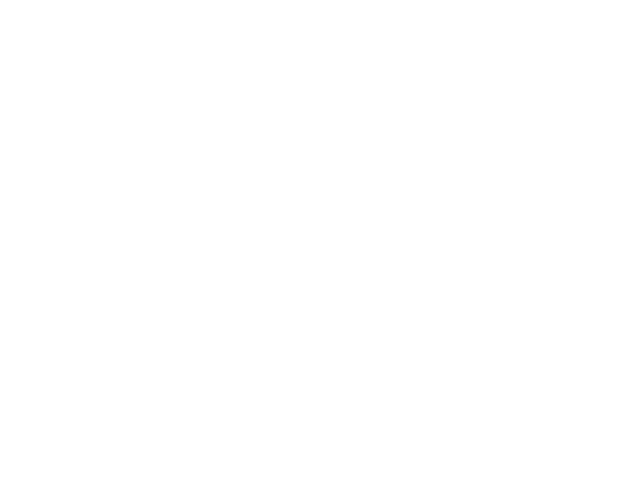

ValueError: x and y must be the same size

In [159]:
fig = plt.figure(1)
axes = fig.add_subplot(111)
axes.scatter(1.2, lis, s= 2)
plt.show()

In [105]:
def lister(vals, i):
    z = df[df['ID'] == 1002]
    z['Paid Loans'] = df[df['ID'] == 1002]['Paid Loans'].tolist()[:i+1]
    print(len(z['Paid Loans'].tolist()))
    return z

lister([123123], 2)

1


C:\Users\mittr\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,ID,A/c Bal,Fixed Deposit,Active Loans,Level of Referees,Paid Loans,col12,Paid Loans Sum,Reference_factor,penalty_active_loans,final
2,1002,2248,26000,[3450000],"[4, 1]","[1630000, 5260000, 7940000]",0.0,2.758557,0.75,-3.45,0.058557
